<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>RSNET</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils
import tensorflow_addons as tfa

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.5.0-dev20210226'

# CIFAR10 Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
# Download the mnist dataset using keras
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# Counting unique value of train data
unique, counts = np.unique(train_label, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}'

# Preprocessing

In [7]:
# Normalizing
train_data_proc = train_data / 255
test_data_proc = test_data / 255

#One hot encoding
train_label_proc = utils.to_categorical(train_label, 10)
test_label_proc = utils.to_categorical(test_label, 10)

# Base-Line Model

In [8]:
input_base = layers.Input((32, 32, 3))

In [9]:
layer_base = layers.Conv2D(32, 4, activation="relu")(input_base)
layer_base = layers.MaxPool2D(2)(layer_base)
layer_base = layers.Conv2D(64, 3, activation="relu")(layer_base)
layer_base = layers.MaxPool2D(2)(layer_base)

In [10]:
layer_base  = layers.Flatten()(layer_base)
layer_base  = layers.Dense(256, activation="relu")(layer_base)
output_base = layers.Dense(10, activation="softmax")(layer_base)

In [11]:
model_base = models.Model(input_base, output_base)
model_base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               590080

In [12]:
model_base.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [13]:
history_base = model_base.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 5s 14ms/step - loss: 1.7892 - accuracy: 0.3549 - val_loss: 1.3416 - val_accuracy: 0.5211
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 1.2720 - accuracy: 0.5504 - val_loss: 1.2000 - val_accuracy: 0.5816
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 1.1345 - accuracy: 0.6016 - val_loss: 1.0927 - val_accuracy: 0.6197
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 1.0292 - accuracy: 0.6418 - val_loss: 1.0343 - val_accuracy: 0.6414
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 0.9670 - accuracy: 0.6648 - val_loss: 1.0498 - val_accuracy: 0.6391
Epoch 6/50
196/196 [==============================] - 1s 7ms/step - loss: 0.9134 - accuracy: 0.6843 - val_loss: 0.9717 - val_accuracy: 0.6633
Epoch 7/50
196/196 [==============================] - 1s 7ms/step - loss: 0.8525 - accuracy: 0.7058 - val_loss: 0.9590 - val_accuracy: 0.6691
Epoch

<AxesSubplot:>

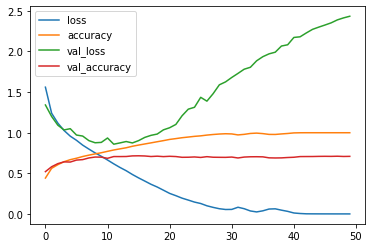

In [14]:
pd.DataFrame(history_base.history).plot()

# Advanced Model

In [15]:
input_adv = layers.Input((32, 32, 3))

In [16]:
layer_adv = layers.Conv2D(32, 4, activation="relu")(input_adv)
layer_adv = layers.Conv2D(32, 4, activation="relu")(input_adv)
layer_adv = layers.MaxPool2D(2)(layer_adv)
layer_adv = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_adv)
layer_adv = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_adv)
layer_adv = layers.MaxPool2D(2)(layer_adv)
layer_adv = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_adv)
layer_adv  = layers.GlobalAveragePooling2D()(layer_adv)

In [17]:
output_adv = layers.Dense(10, activation="softmax")(layer_adv)

In [18]:
model_adv = models.Model(input_adv, output_adv)
model_adv.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         7385

In [19]:
model_adv.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [20]:
history_dev = model_adv.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 2.0342 - accuracy: 0.2394 - val_loss: 1.6002 - val_accuracy: 0.4073
Epoch 2/50
196/196 [==============================] - 3s 14ms/step - loss: 1.5918 - accuracy: 0.4073 - val_loss: 1.5265 - val_accuracy: 0.4424
Epoch 3/50
196/196 [==============================] - 3s 13ms/step - loss: 1.4653 - accuracy: 0.4649 - val_loss: 1.3425 - val_accuracy: 0.5086
Epoch 4/50
196/196 [==============================] - 3s 13ms/step - loss: 1.3359 - accuracy: 0.5189 - val_loss: 1.2803 - val_accuracy: 0.5336
Epoch 5/50
196/196 [==============================] - 3s 14ms/step - loss: 1.2589 - accuracy: 0.5511 - val_loss: 1.2032 - val_accuracy: 0.5729
Epoch 6/50
196/196 [==============================] - 3s 13ms/step - loss: 1.1969 - accuracy: 0.5741 - val_loss: 1.1938 - val_accuracy: 0.5703
Epoch 7/50
196/196 [==============================] - 3s 13ms/step - loss: 1.1468 - accuracy: 0.5919 - val_loss: 1.0960 - val_accuracy: 0.6135

<AxesSubplot:>

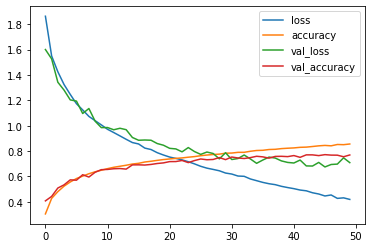

In [21]:
pd.DataFrame(history_dev.history).plot()

# Drop-Out Model

In [32]:
input_dout = layers.Input((32, 32, 3))

In [33]:
layer_dout = layers.Conv2D(32, 4, activation="relu")(input_dout)
layer_dout = layers.Conv2D(32, 4, activation="relu")(layer_dout)
layer_dout = layers.MaxPool2D(2)(layer_dout)
layer_dout = layers.Dropout(0.4)(layer_dout)
layer_dout = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_dout)
layer_dout = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_dout)
layer_dout = layers.MaxPool2D(2)(layer_dout)
layer_dout = layers.Dropout(0.4)(layer_dout)
layer_dout = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_dout)
layer_dout  = layers.GlobalAveragePooling2D()(layer_dout)

In [34]:
output_dout = layers.Dense(10, activation="softmax")(layer_dout)

In [35]:
model_dout = models.Model(input_dout, output_dout)
model_dout.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        3692

In [36]:
model_dout.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [37]:
history_dout = model_dout.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 5s 21ms/step - loss: 2.0704 - accuracy: 0.2104 - val_loss: 1.6079 - val_accuracy: 0.4119
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5998 - accuracy: 0.4053 - val_loss: 1.4651 - val_accuracy: 0.4615
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 1.4592 - accuracy: 0.4638 - val_loss: 1.3368 - val_accuracy: 0.5186
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3665 - accuracy: 0.5085 - val_loss: 1.3026 - val_accuracy: 0.5366
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.2702 - accuracy: 0.5445 - val_loss: 1.1530 - val_accuracy: 0.5900
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1997 - accuracy: 0.5733 - val_loss: 1.1220 - val_accuracy: 0.5981
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1596 - accuracy: 0.5888 - val_loss: 1.0651 - val_accuracy: 0.6189

<AxesSubplot:>

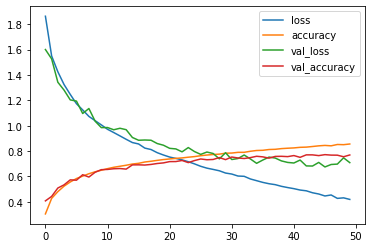

In [38]:
pd.DataFrame(history_dev.history).plot()

# Batch Normalization Model

In [45]:
input_nor = layers.Input((32, 32, 3))

In [46]:
layer_nor = layers.Conv2D(32, 4, activation="relu")(input_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.Conv2D(32, 4, activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.MaxPool2D(2)(layer_nor)
layer_nor = layers.Dropout(0.4)(layer_nor)
layer_nor = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.MaxPool2D(2)(layer_nor)
layer_nor = layers.Dropout(0.4)(layer_nor)
layer_nor = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor  = layers.GlobalAveragePooling2D()(layer_nor)

In [47]:
output_nor = layers.Dense(10, activation="softmax")(layer_nor)

In [48]:
model_nor = models.Model(input_nor, output_nor)
model_nor.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 29, 32)        128       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26, 32)        16416     
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0   

In [49]:
model_nor.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [50]:
history_nor = model_nor.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5972 - accuracy: 0.4137 - val_loss: 2.8052 - val_accuracy: 0.1070
Epoch 2/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0767 - accuracy: 0.6154 - val_loss: 2.9352 - val_accuracy: 0.2000
Epoch 3/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9152 - accuracy: 0.6770 - val_loss: 1.0800 - val_accuracy: 0.6225
Epoch 4/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8152 - accuracy: 0.7154 - val_loss: 0.8253 - val_accuracy: 0.7117
Epoch 5/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7374 - accuracy: 0.7424 - val_loss: 0.7680 - val_accuracy: 0.7306
Epoch 6/50
196/196 [==============================] - 4s 20ms/step - loss: 0.6913 - accuracy: 0.7565 - val_loss: 0.7011 - val_accuracy: 0.7564
Epoch 7/50
196/196 [==============================] - 4s 20ms/step - loss: 0.6387 - accuracy: 0.7782 - val_loss: 0.7632 - val_accuracy: 0.7384

<AxesSubplot:>

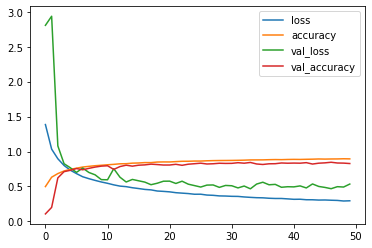

In [51]:
pd.DataFrame(history_nor.history).plot()

# Data Augmentation

In [52]:
input_aug = layers.Input((32, 32, 3))

In [53]:
layer_aug = layers.Conv2D(32, 4, activation="relu")(input_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(32, 4, activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)
layer_aug = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)
layer_aug = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug  = layers.GlobalAveragePooling2D()(layer_aug)

In [54]:
output_aug = layers.Dense(10, activation="softmax")(layer_aug)

In [55]:
model_aug = models.Model(input_aug, output_aug)

In [56]:
model_aug.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [57]:
image_gen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.1
)
train_gen = image_gen.flow(train_data_proc, train_label_proc)

In [58]:
history_aug = model_aug.fit(
    train_gen,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
1563/1563 [==============================] - 22s 13ms/step - loss: 1.6050 - accuracy: 0.4133 - val_loss: 1.4651 - val_accuracy: 0.5170
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1668 - accuracy: 0.5856 - val_loss: 1.0533 - val_accuracy: 0.6301
Epoch 3/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0116 - accuracy: 0.6440 - val_loss: 0.9306 - val_accuracy: 0.6829
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9421 - accuracy: 0.6697 - val_loss: 0.9274 - val_accuracy: 0.6843
Epoch 5/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8907 - accuracy: 0.6879 - val_loss: 0.8852 - val_accuracy: 0.7040
Epoch 6/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8534 - accuracy: 0.7025 - val_loss: 0.7994 - val_accuracy: 0.7348
Epoch 7/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8207 - accuracy: 0.7164 - val_loss: 0.6743 -

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(history_aug.history).plot()